# Feature selection (simple)

Download the fruits data [here](https://drive.google.com/file/d/1M8tiAWDZclABJN1Meq9oEHCLJTNyHdpP/view?usp=share_link)

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix


In [7]:
np.random.seed(1)

# Load dataset
data = pd.read_csv('/content/fruits_data_ext.csv')  # Replace 'your_dataset.csv' with the path to your dataset file
X = data[['width', 'height']].values  # Replace 'target_column_name' with the name of your target column
y = data['fruit_label']


## Add some noisy data to degrade features
random_columns = np.random.permutation(22)
random_features = np.random.RandomState(1000).uniform(0, 0.5, size=(X.shape[0], 20))
X = np.hstack((X, random_features))
X = X[:, random_columns]

print (X.shape, y.shape)

(177, 22) (177,)


In [8]:
# Normalize data to 0-1
X = MinMaxScaler().fit_transform(X)

# Split dataset to select feature and evaluate the classifier
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
print (X_train.shape, X_test.shape, y_train.shape, y_test.shape)
print ("\n", random_columns, "\n", np.arange(22))

(132, 22) (45, 22) (132,) (45,)

 [19 16  3 13 18 15 10  4  2 17  6  7  1 14  0 21 20  9  8 12 11  5] 
 [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]


## Classification using SVC

Accuracy: 0.6444444444444445


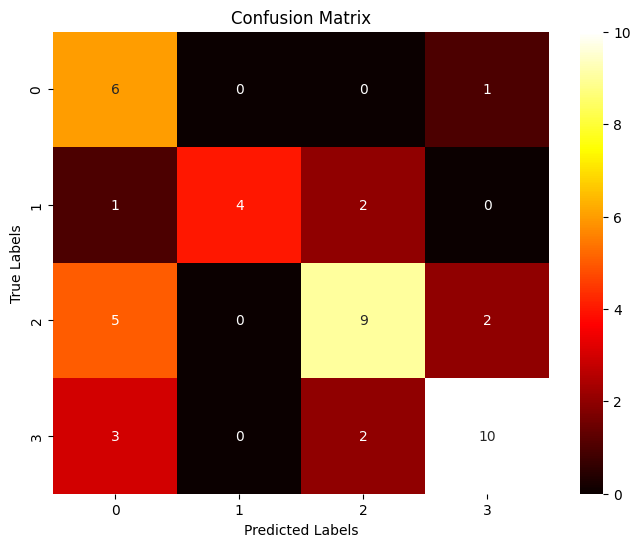

In [9]:
# Train a classifier using SVC on train data

# Training the SVC classifier
classifier = SVC(kernel='linear')
classifier.fit(X_train, y_train)

# Making predictions on the test set
y_pred = classifier.predict(X_test)

# Evaluating the classifier
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='hot')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

## Use Recursive Feature Elimination

### RFE -> [Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html#sklearn.feature_selection.RFE)


In [10]:
from sklearn.feature_selection import RFE

# Create a new SVC classifier
clf = SVC(kernel = 'linear')

# Compute RFE
rfe = RFE( estimator = clf , n_features_to_select = 3 )

best_features = rfe.fit( X_train , y_train )


In [11]:
# See results
print("Num Features: %d" % best_features.n_features_)
print("Selected Features: %s" % best_features.ranking_)
print("                 : %s" % np.arange(22))

Num Features: 3
Selected Features: [ 3 18 11 14  2  9 19 17 16  8 10  4  1 12  1 15  7  1 20  6  5 13]
                 : [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]


In [12]:
list_best = np.where(best_features.ranking_ == 1)[0].tolist()
print (list_best)

[12, 14, 17]


In [13]:
# Select best features
best_train = rfe.transform(X_train)
best_test  = rfe.transform(X_test)

print(best_train.shape, best_test.shape)

(132, 3) (45, 3)


Accuracy (Original): 0.6444444444444445
Accuracy (Best Features): 0.7777777777777778


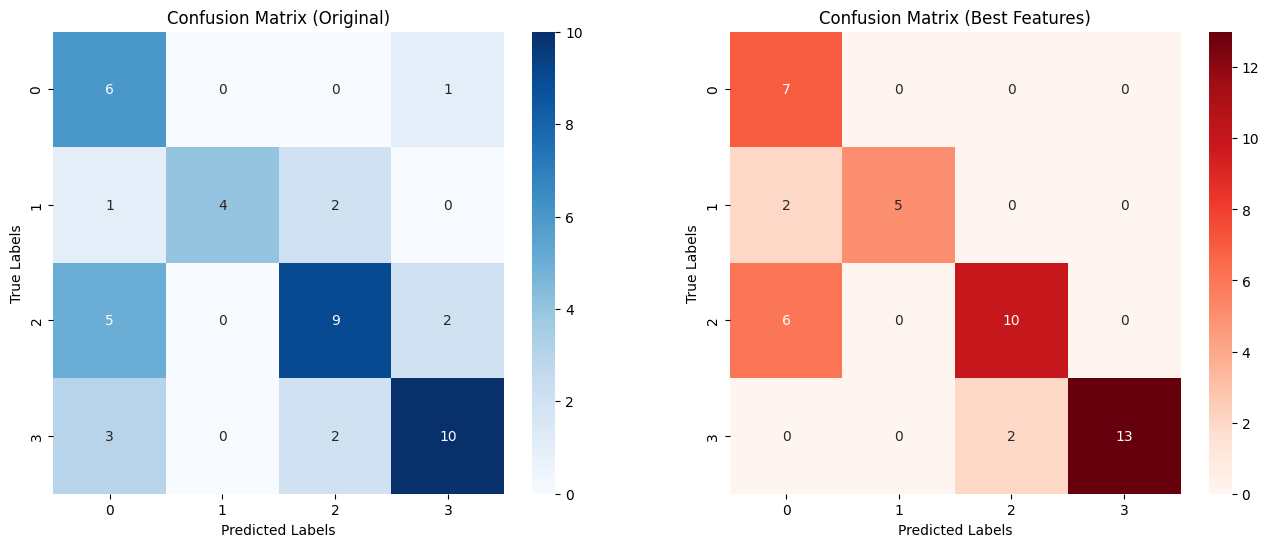

In [14]:
# Retrain classifier on best features and make predictions
clf.fit(best_train, y_train)

# Make predictions on the test set using the classifier trained on best features
y_pred_best = clf.predict(best_test)

# Evaluating the classifier
accuracy_best = accuracy_score(y_test, y_pred_best)
conf_matrix_best= confusion_matrix(y_test, y_pred_best)

# Print accuracies
print("Accuracy (Original):", accuracy)
print("Accuracy (Best Features):", accuracy_best)

# Plot confusion matrices
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Original confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('Confusion Matrix (Original)')
axes[0].set_xlabel('Predicted Labels')
axes[0].set_ylabel('True Labels')

# Best features confusion matrix
sns.heatmap(conf_matrix_best, annot=True, fmt='d', cmap='Reds', ax=axes[1])
axes[1].set_title('Confusion Matrix (Best Features)')
axes[1].set_xlabel('Predicted Labels')
axes[1].set_ylabel('True Labels')

plt.show()

## Use univariate selection to determine best features


### SelectKBest -> [Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html#sklearn.feature_selection.SelectKBest)

Metrics: [F_classif (ANOVA)](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.f_classif.html#sklearn.feature_selection.f_classif), [Chi2](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.chi2.html#sklearn.feature_selection.chi2), [mutual_information](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.mutual_info_classif.html#sklearn.feature_selection.mutual_info_classif)

In [15]:
from sklearn.feature_selection import SelectKBest, f_classif, chi2 #ANOVA

skb = SelectKBest( f_classif , k = 10 )
skb.fit( X_train , y_train )
#best_train = _
#best_test = _

#print (best_train.shape)

SelectKBest()

In [16]:
print("Num Features: %d" % best_train.shape[0])
print("Selected Features: %s" % np.array(skb.get_support(),dtype=int).tolist())
print("                 : %s" % np.arange(22))

Num Features: 132
Selected Features: [1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1]
                 : [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]


In [17]:
# Retrain classifier on best features and make predictions
from sklearn.feature_selection import SelectKBest, f_classif, chi2 #ANOVA
from sklearn.svm import SVC # or any other classifier you're using

# Step 1: Feature selection
skb = SelectKBest(f_classif, k=10)
skb.fit(X_train, y_train)

# Step 2: Print selected features
selected_features = np.array(skb.get_support(), dtype=int).tolist()
print("Num Features: %d" % np.sum(selected_features))
print("Selected Features: %s" % selected_features)
print("                 : %s" % np.arange(22))

# Step 3: Retrain classifier on best features and make predictions
# Assuming you have X_train, y_train, X_test, y_test defined
X_train_selected = X_train[:, selected_features]
X_test_selected = X_test[:, selected_features]

# Initialize and train your classifier
classifier = SVC() # You can replace this with any other classifier
classifier.fit(X_train_selected, y_train)

# Make predictions
predictions = classifier.predict(X_test_selected)



Num Features: 10
Selected Features: [1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1]
                 : [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]


Accuracy (Original): 0.6444444444444445
Accuracy (Best Features): 0.15555555555555556


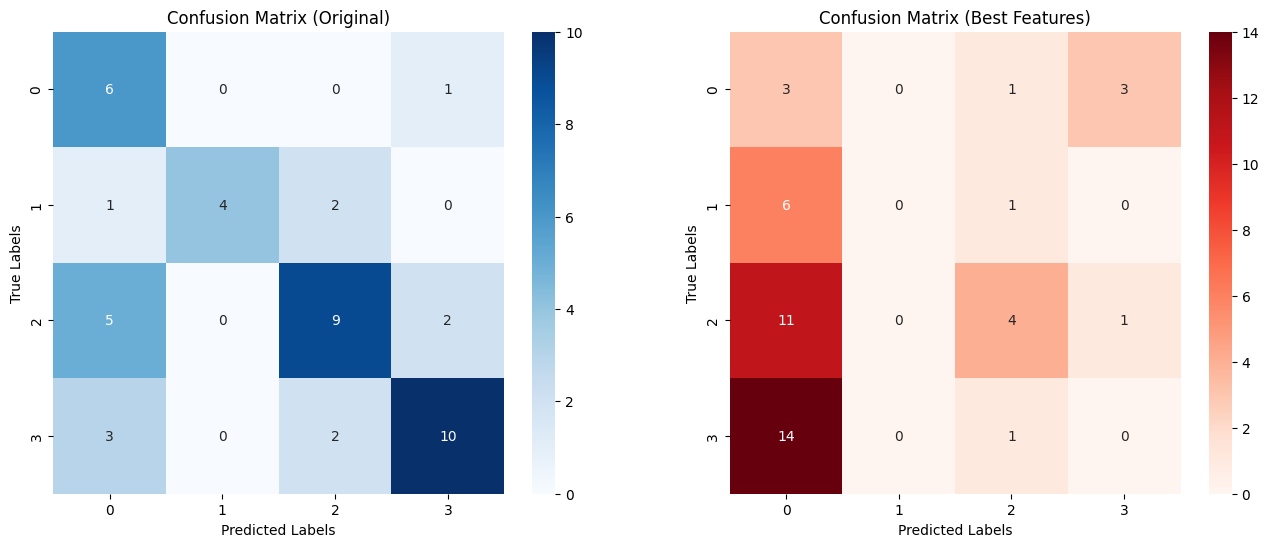

In [18]:
# Evaluating the classifier
accuracy_best = accuracy_score(y_test, predictions)
conf_matrix_best= confusion_matrix(y_test,predictions)

# Print accuracies
print("Accuracy (Original):", accuracy)
print("Accuracy (Best Features):", accuracy_best)

# Plot confusion matrices
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Original confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('Confusion Matrix (Original)')
axes[0].set_xlabel('Predicted Labels')
axes[0].set_ylabel('True Labels')

# Best features confusion matrix
sns.heatmap(conf_matrix_best, annot=True, fmt='d', cmap='Reds', ax=axes[1])
axes[1].set_title('Confusion Matrix (Best Features)')
axes[1].set_xlabel('Predicted Labels')
axes[1].set_ylabel('True Labels')

plt.show()

### SelectPercentile -> [Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectPercentile.html#sklearn.feature_selection.SelectPercentile)

In [ ]:
from sklearn.feature_selection import SelectPercentile, f_classif, chi2 #ANOVA

spc = SelectPercentile( _ , percentile = _ )
spc.fit( _ , _ )

best_train =
best_test =

print (best_train.shape)

In [ ]:
print("Num Features: %d" % best_train.shape[0])
print("Selected Features: %s" % _ )
print("                 : %s" % np.arange(22))

In [ ]:
# Retrain classifier on best features and make predictions



In [ ]:
# Compute metrics
acc_best =
cm_best  =

print("For Recursive feature elimination")



## Use Metatransformer to determine best features

### SelectFromModel -> [Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectFromModel.html#sklearn.feature_selection.SelectFromModel)

In [ ]:
from sklearn.feature_selection import SelectFromModel

# Create a new SVC classifier
clf = _

# Compute metatransformer
sfm = SelectFromModel(estimator = clf)

best_features = sfm.fit(X_train, y_train)

In [ ]:
# Transform best features
best_train = _
best_test  = _

print(best_train.shape, best_test.shape)

In [ ]:
print("Num Features: %d" % sfm.n_features_in_)
print("Selected Features: %s" % _ )
print("                 : %s" % np.arange(22))

In [ ]:
# Retrain classifier on best features and make predictions



In [ ]:
# Compute metrics
acc_best =
cm_best  =

print("For Recursive feature elimination")

